In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## part a:

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

df = pd.DataFrame(iris['data'])
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
np.unique(iris.target,return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
##                 rescaling data to a standard deviation of 1:

In [7]:
from scipy.cluster.vq import whiten
scaled_data = whiten(df.to_numpy())
scaled_data

array([[ 6.17956139,  8.05688682,  0.79572398,  0.26326437],
       [ 5.93722565,  6.90590299,  0.79572398,  0.26326437],
       [ 5.69488991,  7.36629652,  0.73888655,  0.26326437],
       [ 5.57372204,  7.13609975,  0.8525614 ,  0.26326437],
       [ 6.05839352,  8.28708359,  0.79572398,  0.26326437],
       [ 6.543065  ,  8.97767388,  0.96623626,  0.52652874],
       [ 5.57372204,  7.82669005,  0.79572398,  0.39489655],
       [ 6.05839352,  7.82669005,  0.8525614 ,  0.26326437],
       [ 5.3313863 ,  6.67570622,  0.79572398,  0.26326437],
       [ 5.93722565,  7.13609975,  0.8525614 ,  0.13163218],
       [ 6.543065  ,  8.51728035,  0.8525614 ,  0.26326437],
       [ 5.81605778,  7.82669005,  0.90939883,  0.26326437],
       [ 5.81605778,  6.90590299,  0.79572398,  0.13163218],
       [ 5.21021843,  6.90590299,  0.6252117 ,  0.13163218],
       [ 7.02773649,  9.20787065,  0.68204912,  0.26326437],
       [ 6.90656862, 10.12865772,  0.8525614 ,  0.52652874],
       [ 6.543065  ,  8.

In [8]:
pd.DataFrame(scaled_data).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,7.080243,7.037882,2.135951,1.578709
std,1.003350,1.003350,1.003350,1.003350
min,5.210218,4.603935,0.568374,0.131632
25%,6.179561,6.445509,0.909399,0.394897
50%,7.027736,6.905903,2.472428,1.711218
75%,7.754744,7.596493,2.898709,2.369379
max,9.572262,10.128658,3.921782,3.290805


In [9]:
from scipy.cluster.hierarchy import fcluster, linkage

In [10]:
distance_matrix = linkage(scaled_data, method = 'ward', metric = 'euclidean')
distance_matrix

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.31632184e-01, 2.00000000e+00],
       [1.27000000e+02, 1.38000000e+02, 1.33836265e-01, 2.00000000e+00],
       [2.00000000e+00, 4.70000000e+01, 1.33836265e-01, 2.00000000e+00],
       [1.90000000e+01, 4.60000000e+01, 1.43378956e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.43378956e-01, 2.00000000e+00],
       [1.20000000e+02, 1.43000000e+02, 1.66143388e-01, 2.00000000e+00],
       [1.00000000e+00, 2.50000000e+01, 1.66143388e-01, 2.00000000e+00],
       [1.10000000e+01, 2.40000000e+01, 1.70512281e-01, 2.00000000e+00],
       [4.00000000e+01, 1.53000000e+02, 1.72216546e

In [11]:
## part b:

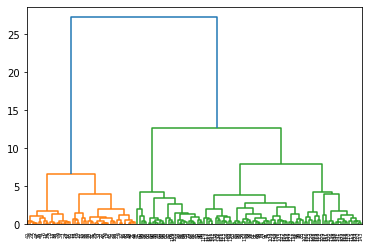

In [12]:
from scipy.cluster.hierarchy import dendrogram

dn = dendrogram(distance_matrix)
plt.show()

In [13]:
## part c:

In [14]:
df['cluster_labels_6'] = fcluster(distance_matrix, 6, depth=6, criterion='distance')
df['cluster_labels_6']

0      2
1      1
2      1
3      1
4      2
      ..
145    5
146    4
147    4
148    5
149    4
Name: cluster_labels_6, Length: 150, dtype: int32

In [15]:
df.cluster_labels_6.value_counts()

4    45
3    30
2    29
5    26
1    20
Name: cluster_labels_6, dtype: int64

Text(0.5, 1.0, 'Hierarchical with 6')

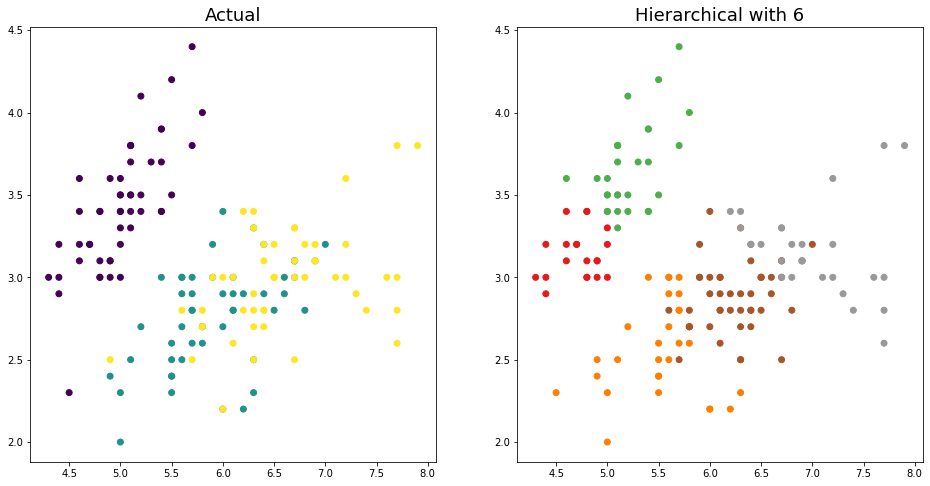

In [16]:
df['target'] = iris.target
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df[0], df[1], c=df['target'])
axes[1].scatter(df[0], df[1], c=df['cluster_labels_6'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Hierarchical with 6', fontsize=18)

In [17]:
## part d:

In [18]:
df['cluster_labels_3'] = fcluster(distance_matrix, 3, depth=3, criterion='distance')
df['cluster_labels_3']

0       3
1       1
2       1
3       1
4       3
       ..
145    11
146     7
147     8
148    11
149     8
Name: cluster_labels_3, Length: 150, dtype: int32

In [19]:
df.cluster_labels_3.value_counts()

8     32
3     22
1     20
6     17
11    15
7     13
9      8
5      8
2      7
4      5
10     3
Name: cluster_labels_3, dtype: int64

Text(0.5, 1.0, 'Hierarchical with 3')

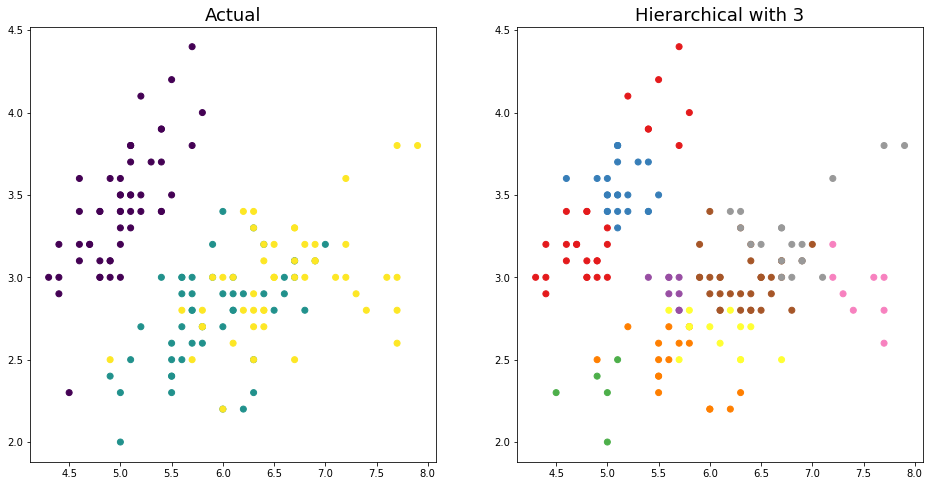

In [20]:
df['target'] = iris.target
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df[0], df[1], c=df['target'])
axes[1].scatter(df[0], df[1], c=df['cluster_labels_3'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Hierarchical with 3', fontsize=18)